# Churn prediction in Banking

##  Introducción

Gestionar la cartera de clientes para reducir la fuga está entre las principales prioridades de cualquier ejecutivo y empresa actualmente. Según diversos estudios, aquellas empresas que implementan un enfoque integral y basado en el análisis avanzado de datos pueden reducir su fuga de clientes en torno a un 15 %.

No sólo se trata de un número atractivo por su impacto en la cuenta de resultados (un 5 % de reducción del ratio de fuga puede significar beneficios entre 25-95 %), sino que además, los clientes persistentes también tienen más probabilidad de aumentar el grado de compromiso con la compañía, así como estar abiertos a nuevas oportunidades de up-selling y cross-selling.

La fuga de clientes ha pasado de ser una métrica reactiva, con diversos factores a ajustar por el lado de la empresa, a convertirse en una métrica proactiva, mejorando la situación de aquellos clientes propensos a abandonar tiempo antes de que ejecuten su decisión.


## ¿Cómo afectan los atributos a la variable target y como medir la incertidumbre de tus conclusiones?

Nuestro modelo no debería finalizar únicamente con un conjunto de probabilidades y buenas métricas, sino que es conveniente analizar la explicabilidad del modelo, así como analizar los atributos que más contribuyen a la fuga de clientes, haciendo de traductores a la parte de negocio, dónde podrán realizar acciones específicas sobre clientes con alta propensión a fuga en base a los atributos más relevantes en el problema.

Hay ciertos modelos como la regresión logística que nos permite analizar como un conjunto de variables afectan a la variable target. 

La distribución posterior sobre los pesos nos da una estimación de la influencia de cada variable en la probabilidad de que la variable target sea igual a 1. Este hecho es muy importante para el análisis de datos, ya que no sólo consiste en tener un buen modelo sino también medir la incertidumbre de tús conclusiones.

He desarrollado un ejemplo con un dataset público del sector bancario

In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv(r'C:\Users\jmruizr\Downloads\Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
lower_column_name = []
columns = data.columns
for i in range(len(columns)):
    lower_column_name.append(columns[i].lower())
data.columns = lower_column_name

In [5]:
#Drop irrelevant columns 
data.drop(['rownumber','surname'],axis=1,inplace=True)

In [6]:
#Separating churn and non churn customers

churn     = data[data["exited"] == 1]
not_churn = data[data["exited"] == 0]
target_col = ["exited"]
cat_cols   = data.nunique()[data.nunique() < 15].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

In [9]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [10]:
#Genero
plot_pie(cat_cols[1])

## ¿Afecta la variable género a la fuga de clientes?

Vamos a usar el concepto de odds

Si tenemos una variable aleatoria binaria (fuga de clientes) y la probabilidad de abandono es 0.8, se puede decir que odds es 4 frente a 1, porque la probabilidad de que abandone es 4 veces mayor que se mantenga $\frac{p(y = 1)}{p(y = 0)} = \frac{0.8}{0.2} = 4$.

Para calcular el efecto del género en la fuga de clientes, vamos a calcular el ratio entre las odds de género masculino y femenino ante una igualdad del resto de variables.

Dado un modelo de regresión logística, podemos estimar el ratio de odds para alguna variable solamente mirando al correspondiente coeficiente. Pero incluso si se cumplen todos los supuestos de regresión logistica, no deberíamos estimar el coeficiente a partir de los datos disponibles únicamente ya que es recomendable construir intervalos de confianza.


In [12]:
with pm.Model() as manual_logistic_model:
    alpha = pm.Normal('alpha', mu=0, sd=150)
    beta1 = pm.Normal('beta1', mu=0, sd=150)
    beta2 = pm.Normal('beta2', mu=0, sd=150)
    
    X1 = data['age'].values
    X2 = data['tenure'].values
    p_y_given_x = pm.invlogit(alpha + beta1*X1 + beta2*X2)

    likelihood = pm.Bernoulli('likelihood', p=p_y_given_x, observed=data['exited'].values)
    
    map_estimate = pm.find_MAP()
    print(map_estimate)

logp = -4,692.6, ||grad|| = 8.2137: 100%|██████████████████████████████████████████████| 34/34 [04:40<00:00,  8.24s/it]

{'alpha': array(-3.87455534), 'beta1': array(0.06292997), 'beta2': array(-0.01073018)}


Primero de todo, creamos un modelo bayesiano de regresión logística con las variables edad, tenure y como variable target, la fuga/no del cliente 


$$ p(y = 1 \mid \alpha, \beta_1, \beta_2) = \sigma(\alpha + \beta_1 x_1 + \beta_2 x_2) $$$$ \alpha \sim N(0, 150^2) $$$$ \beta_1 \sim N(0, 150^2) $$$$ \beta_2 \sim N(0, 150^2) $$

donde $x_1$ es la variable edad, $x_2$ es la variable tenure, y indica la fuga o no del cliente, $\alpha$, $\beta_1$ y $\beta_2$ son los parámetros del modelo.

Creamos con Pymc Bernoulli el vector aleatorio con probabilidad de éxito igual a 1 correspondiente al valor arrojado por la función sigmoid y usamos pm.find_MAP() método para encontrar el máximo a posteriori de los pesos de los coeficientes de la regresión logística.



Mediante MCMC inference podemos encontrar los intervalos de confianza para cada coeficiente.

In [13]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('exited ~ creditscore + age + tenure + balance + hascrcard + gender ', data, family=pm.glm.families.Binomial())
    trace = pm.sample(300, step=pm.Metropolis(), chains=1)

Only 300 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [hascrcard]
>Metropolis: [balance]
>Metropolis: [tenure]
>Metropolis: [age]
>Metropolis: [creditscore]
>Metropolis: [gender[T.Male]]
>Metropolis: [Intercept]
Sampling chain 0, 0 divergences: 100%|█████████████████████████████████████████████| 800/800 [3:11:40<00:00, 14.38s/it]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [14]:
trace['gender[T.Male]'].shape

(300,)

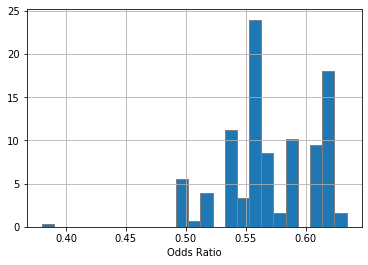

In [15]:
b = trace['gender[T.Male]']
plt.hist(np.exp(b), bins=25, normed=True, edgecolor='grey')
plt.xlabel("Odds Ratio")
plt.grid(True)
plt.show()

In [16]:
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
print("P(%.3f < Odds Ratio < %.3f) = 0.95" % (np.exp(lb), np.exp(ub)))

P(0.498 < Odds Ratio < 0.623) = 0.95


P(0.498 < Odds Ratio < 0.623) = 0.95

Con probabilidad de 0.95, el odds ratio es menor que 0.62 y mayor que 0.581, con lo que la variable género afecta a la fuga de clientes, ya que un cliente hombre tiene 0.62 veces menos probabilidad de abandonar el banco.

Conclusion: Sí, podemos afirmrar con un 95 % de confianza que una mujer es más propensa a dejar el banco que un hombre con la misma edad, deuda, nivel salarial, calificacion crediticia, etc
